# OpenCV Experimentation Notebook
I am writing this notebook using the reference book Applied Deep Learning and Computer Vision for Self-Driving Cars which can be found [here](https://learning.oreilly.com/library/view/applied-deep-learning/9781838646301/).

Topics covered in this notebook:
* Converting images from different color spaces (e.g. BGR, HSV)
* Filtering images using blurring and sharpening kernels
* Edge detection and gradient calculation

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Change an Image to Grayscale and Experiment with Filters

(354, 529, 3)


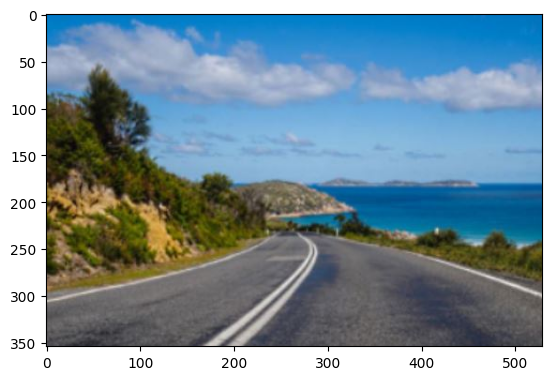

In [3]:
image_color = mpimg.imread('image.jpg')
plt.imshow(image_color)
print(image_color.shape)

(354, 529)


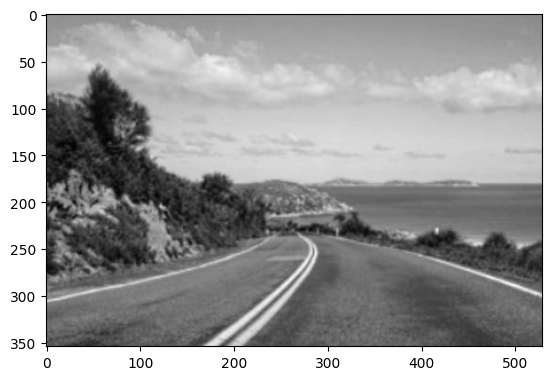

In [5]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
print(image_gray.shape)

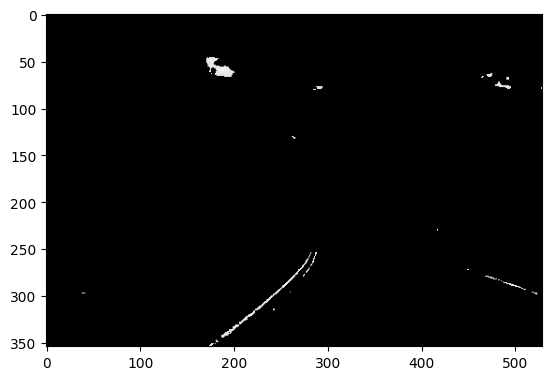

In [9]:
# Create a copy of the grayscale image and then filter on any value that is not white
image_gray_copy = np.copy(image_gray)
image_gray_copy[ (image_gray_copy[:,:] < 200) ] = 0
plt.imshow(image_gray_copy, cmap='gray')
plt.show()

### Experiment with Color Space Manipulation

(889, 1344, 3)


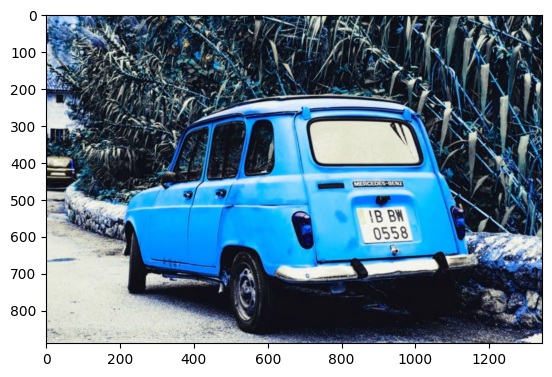

In [7]:
# Read in the image using OpenCV rather than matplotlib
test_image = cv2.imread('test_image.JPG')
plt.imshow(test_image)
print(test_image.shape)

In [8]:
# Opens a pop-up window with the image - notice the color differences. OpenCV uses a default color space of BGR while
# matplotlib uses a color space of RGB as the default.
cv2.imshow('Self Driving Car!', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# Convert the test image from BGR to HSV and launch both in separate windows for comparison
test_image = cv2.imread('test_image.jpg')
cv2.imshow('Self Driving Car!', test_image)

hsv_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV Image', hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Hue channel')

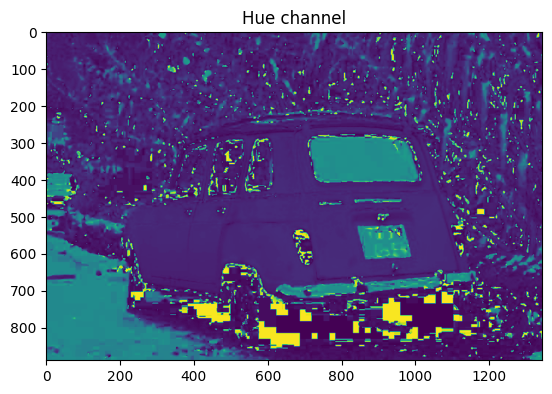

In [13]:
plt.imshow(hsv_image[:, :, 0])
plt.title('Hue channel')


Text(0.5, 1.0, 'Value channel')

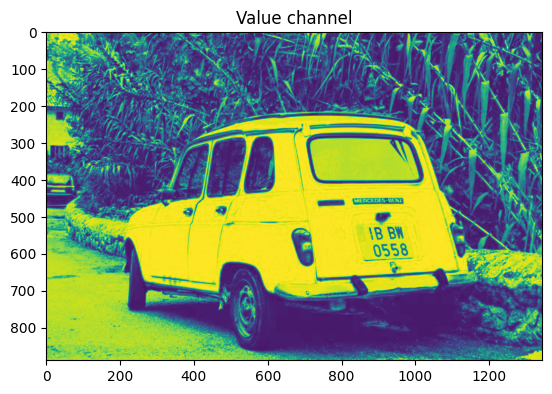

In [14]:
plt.imshow(hsv_image[:, :, 2])
plt.title('Value channel')

Text(0.5, 1.0, 'Saturation channel')

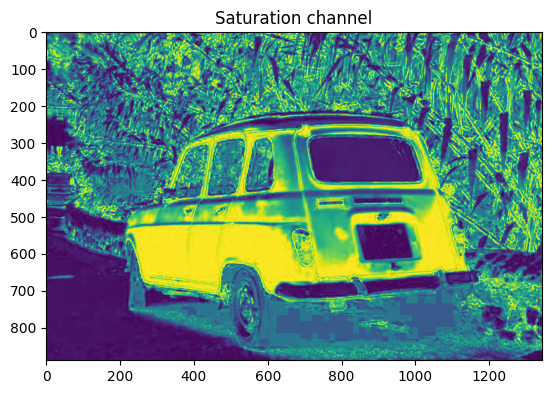

In [15]:
plt.imshow(hsv_image[:, :, 1])
plt.title('Saturation channel')

In [18]:
# Split the test image
B, G, R = cv2.split(test_image)
print(B.shape, G.shape, R.shape)

# Display the G channel to check
cv2.imshow("Green Channel", G)
cv2.waitKey(0)
cv2.destroyAllWindows()

(889, 1344) (889, 1344) (889, 1344)


In [20]:
# Create a channel with all zeros and merge it with the blue channel
zeros = np.zeros(test_image.shape[:2], dtype="uint8")

cv2.imshow("Blue Channel merged!", cv2.merge([B, zeros, zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Merge all the channels back together but add some extra blue
image_merged = cv2.merge([B+100, G, R])      
cv2.imshow("Merged Image!", image_merged) 

cv2.waitKey(0)
cv2.destroyAllWindows()

### Convolution
Applying a kernel matrix to an image results in a feature map. An image kernel is thus useful for applying certain effects to images (e.g. sharpening, blurring). Spatial relationships between pixels are preserved in this process.

**Sharpening** (the sharpen kernel) will emphasize details by highlighting differences between adjacent pixel values to increase the contrast.

**Blurring** (the blurring kernel) will average each pixel value and its neighbors and then normalize so it sums to 1. If it does not sum to one, the resulting image will be either brighter or darker.

In [23]:
# Apply a sharpening filter to the test image

test_image = cv2.imread('test_image.JPG')
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

Sharp_Kernel_1 = np.array([[0,-1,0], 
                           [-1,5,-1], 
                           [0,-1,0]])

sharpened_gray_image = cv2.filter2D(gray_image, -1, Sharp_Kernel_1)
cv2.imshow('Sharpened Image Grayscale', sharpened_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# Make it even sharper with a different sharpening kernel

Sharp_Kernel_2 = np.array([[-1,-1,-1], 
                           [-1,9,-1], 
                           [-1,-1,-1]])

sharpened_gray_image = cv2.filter2D(gray_image, -1, Sharp_Kernel_2)
cv2.imshow('Even Sharper Image Grayscale', sharpened_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# Experiment with the blurring kernel now.
# This is the non-normalized blurring kernel and the image is much lighter.
Blurr_Kernel = np.ones((3,3))

blurred_gray_image = cv2.filter2D(gray_image, -1, Blurr_Kernel)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# This is the normalized blurring kernel which keeps the image closer to the original "look".
Blurr_Kernel_Normalized = np.ones((3,3)) * 1/9

blurred_gray_image = cv2.filter2D(gray_image, -1, Blurr_Kernel_Normalized)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# Create a stronger blurring kernel
Strong_Blurr_Kernel_Normalized = np.ones((8,8)) * (1/64)

blurred_gray_image = cv2.filter2D(gray_image, -1, Strong_Blurr_Kernel_Normalized)
cv2.imshow('Blurred Image Grayscale', blurred_gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Edge Detection
* Sobel method
  * Calculates the first order derivatives separately for the x-axis and y-axis using two 3x3 kernels that convolve over the original image
  * Computes the gradient using smoothing
* Laplacian method
  * Uses only one kernel to calculate 2nd order derivatives and zero-crossings in one pass
  * Can be sensitive to noise due to the 2nd derivative
* Canny method
  * Most accurate, most commonly used for edge detection

We'll try all three in the following cells to compare them.

In [31]:
# SOBEL METHOD
x_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize = 7)
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
# SOBEL METHOD
y_sobel = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize = 7)
cv2.imshow('Sobel - Y direction', y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
# LAPLACIAN METHOD
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# CANNY METHOD
threshold_1 = 120
threshold_2 = 200

canny = cv2.Canny(gray_image, threshold_1, threshold_2)

cv2.imshow('Canny', canny)
cv2.waitKey()
cv2.destroyAllWindows()

### Image Transformation

Two types:
* Affine transformation
  * This is a linear mapping method that is often used for correcting geometric distortions. These distortions can occur from non-ideal camera angles.
  * The linear mapping method used in these transformations preserves points, straight lines, and planes. Any set of parallel lines will remain paralell when transformed with this method.
* Projective transformation
  * This method maps lines to lines, but does not necessarily preserve parallel lines in the transformed image.

#### We can also rotate, translate, and resize images using OpenCV.

In [35]:
test_image2 = cv2.imread('test_image2.jpg')
cv2.imshow('Original Image', test_image2)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
# Create a rotation matrix around the image center, then rotate the image

# The shape tuple is (rows, columns, channels) but we only need rows and columns so we take the first two elements only
height, width = test_image2.shape[:2]
M_rotation = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5) 

rotated_image = cv2.warpAffine(test_image2, M_rotation, (width, height)) 
cv2.imshow('Rotated', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
test_image3 = cv2.imread('test_image3.jpg')
cv2.imshow('Original Image', test_image3)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
# Translate the image using a translation matrix

height, width = test_image3.shape[:2]
Translation_Matrix = np.float32([[1, 0, 120], 
                                 [0, 1, -150]])

translated_image = cv2.warpAffine(test_image3, Translation_Matrix, (width, height))

cv2.imshow('Translated Image', translated_image)
cv2.waitKey()
cv2.destroyAllWindows()

#### Re-sizing

When re-sizing an image, you need to do some type of interpolation for the pixel values in order to increase or decrease the number of pixels. The interpolation method is the method you're selecting to try and estimate the new pixel values from the existing pixel values.

We're using "INTER_CUBIC" here, which is based on cubic polynomial construction using the 4x4 pixel "neighborhood" to compute the new pixel value. This tends to produce better, smoother, results than the less computationally intensive methods like nearest neighbor and linear interpolation.

[Read more about interpolation methods here.](https://learnopencv.com/image-resizing-with-opencv/#resize-with-interpolation)

In [41]:
# Resize one of the test images
resized_image = cv2.resize(test_image3, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

cv2.imshow('Resized Image', resized_image) 
cv2.waitKey()
cv2.destroyAllWindows()

#### Perspective Transform

In [3]:

image = cv2.imread('Speed_Sign_View_2.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
height, width = image.shape[:2]

source_points = np.float32([[420,70], [580, 50], [590,210], [430, 220] ])
destination_points = np.float32([[0,0], [width,0], [width,height], [0,height]])

M = cv2.getPerspectiveTransform(source_points, destination_points)

warped = cv2.warpPerspective(image, M, (width, height))

cv2.imshow('warped Image', warped)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
# Demonstrate erosion and dialation

kernel = np.ones((3,3), np.uint8)
image_erosion = cv2.erode(image, kernel, iterations=3) 
image_dilation = cv2.dilate(image, kernel, iterations=3)

cv2.imshow('Input', image)
cv2.imshow('Erosion', image_erosion)
cv2.imshow('Dilation', image_dilation)
cv2.waitKey()
cv2.destroyAllWindows()

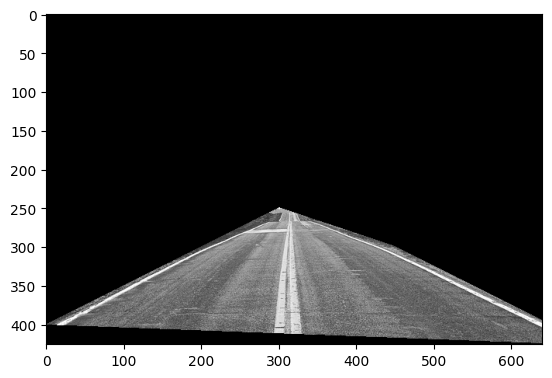

In [8]:
# Mask a point of interest in the image

image_color = cv2.imread('test5.jpg')
height, width = image_color.shape[:2]

# Convert image in grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

blank = np.zeros_like(image_gray)

# Polygon defined by these points is our region of interest
ROI = np.array([[(0, 400),(300, 250), (450, 300), (700, height)]], dtype=np.int32)

# Filling mask of interest
mask = cv2.fillPoly(blank, ROI, 255)

# Perform a bit-wise AND operation
masked_image = cv2.bitwise_and(image_gray, mask)

# Masked Image
plt.imshow(masked_image, cmap = 'gray')

#### Canny Edge Detector

In [9]:
image_c = cv2.imread('calendar.jpg')
cv2.imshow('Given Image', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# Use the Canny edge detection algorithm

image_g = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)

image_canny = cv2.Canny(image_g, 50, 200, apertureSize= 3)

cv2.imshow('canny image', image_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Hough Transform

"In general, the technique is used to find instances of objects that are not perfectly within a certain class by means of a voting procedure."

Can be combined with region of interest masking.

In [11]:
# Apply Hough transform
lines = cv2.HoughLines(image_canny, 1, np.pi/180, 250)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        
        x0 = rho * np.cos(theta)
        y0 = rho * np.sin(theta)
        
        a = np.cos(theta)
        b = np.sin(theta)
        
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_c, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image_c)
cv2.waitKey(0)
cv2.destroyAllWindows()